In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ChickWeight.csv')
df.head()

,Unnamed: 0,weight,Time,Chick,Diet
0,1,42,0,1,1
1,2,51,2,1,1
2,3,59,4,1,1
3,4,64,6,1,1
4,5,76,8,1,1


In [3]:
df = df[['weight', 'Time', 'Chick', 'Diet']]
df.head()

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1


In [4]:
# check for missing values
df.isna().sum()

weight    0
Time      0
Chick     0
Diet      0
dtype: int64

In [5]:
# see how many chicks there are
df['Chick'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [6]:
# check the shape of the df
df.shape

(578, 4)

Since there are 50 chicks and 12 days of measurement, there should be 600 rows.  There must be some missing data, but we can find out where later.  For now there are still some basic things to check out.

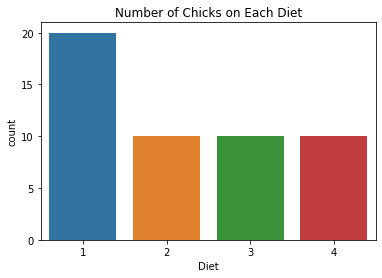

In [7]:
# See how many chicks are on each diet to start
sns.countplot(x='Diet', data=df[df['Time'] == 0])
plt.yticks(range(0, 21, 5))
plt.title('Number of Chicks on Each Diet');

In [8]:
# initial weight distribution (Time = 0)
born = df[df['Time'] == 0]
born.describe()

,weight,Time,Chick,Diet
count,50.000000,50.0,50.00000,50.00000
mean,41.060000,0.0,25.50000,2.20000
std,1.132272,0.0,14.57738,1.17803
min,39.000000,0.0,1.00000,1.00000
25%,41.000000,0.0,13.25000,1.00000
50%,41.000000,0.0,25.50000,2.00000
75%,42.000000,0.0,37.75000,3.00000
max,43.000000,0.0,50.00000,4.00000


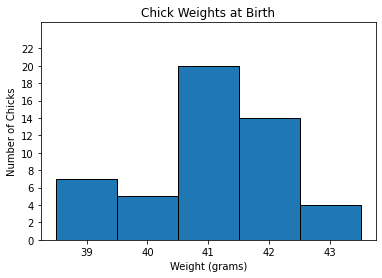

In [9]:
plt.hist(born['weight'], bins=range(39, 45), edgecolor='black', align='left')
plt.xticks(range(39, 44))
plt.yticks(np.arange(0, 24, 2))
plt.ylim(0, 25)
plt.xlabel('Weight (grams)')
plt.ylabel('Number of Chicks')
plt.title('Chick Weights at Birth')
plt.plot();

In [10]:
# final weight distribution (Time = 21)
grown = df[df['Time'] == 21]
grown.describe()

,weight,Time,Chick,Diet
count,45.000000,45.0,45.000000,45.000000
mean,218.688889,21.0,26.088889,2.266667
std,71.510273,0.0,14.687382,1.156012
min,74.000000,21.0,1.000000,1.000000
25%,167.000000,21.0,13.000000,1.000000
50%,205.000000,21.0,27.000000,2.000000
75%,266.000000,21.0,38.000000,3.000000
max,373.000000,21.0,50.000000,4.000000


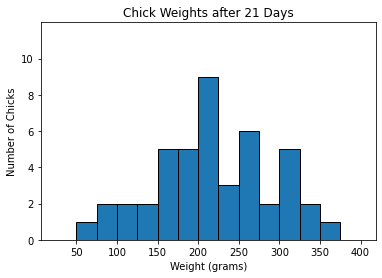

In [11]:
plt.hist(grown['weight'], bins=range(25, 425, 25), edgecolor='black')
plt.xticks(range(50, 425, 50))
plt.yticks(np.arange(0, 12, 2))
plt.ylim(0, 12)
plt.xlabel('Weight (grams)')
plt.ylabel('Number of Chicks')
plt.title('Chick Weights after 21 Days')
plt.plot();

In [12]:
# There are 5 chicks missing from the final weigh-in meaning they don't have all 12 weigh ins
chick_df = df.groupby('Chick')
complete = pd.DataFrame(np.array(chick_df.describe()['Time']['count'] == 12))
missing = np.array(complete[complete[0] == False].index) + 1
print(missing)

[ 8 15 16 18 44]


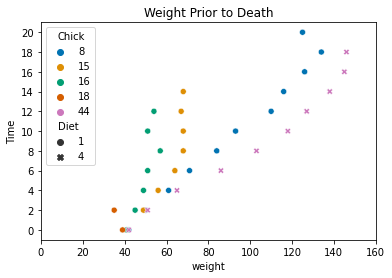

In [13]:
# determine when weight stopped being measured for each of the missing chicks
missing_df = df[df['Chick'].isin(missing)]

sns.scatterplot(x='weight', y='Time', data=missing_df, hue='Chick', style='Diet', palette='colorblind')
plt.yticks(range(0, 21, 2))
plt.xticks(range(0, 170, 20))
plt.title('Weight Prior to Death');

It will be assumed that the chicks died, so they should not be used in the main analysis.  However, it makes sense to look at the diets that the dead chicks were eating to see if there is any relationship.

In [14]:
# create new df for dead chicks
missing_df = df[df['Chick'].isin(missing)]
missing_df = missing_df[missing_df['Time'] == 0]
missing_df

,weight,Time,Chick,Diet
84,42,0,8,1
167,41,0,15,1
175,41,0,16,1
194,39,0,18,1
496,42,0,44,4


It appears that of the 5 chicks that presumably died, 4 were on diet 1.  There isn't enough data to draw any conclusions or do any sort of testing, but it is interesting nonetheless.

Now let's look at how the chicks on each diet progressed over time.

In [15]:
# Remove dead chicks from the df
df = df[~df['Chick'].isin(missing)]

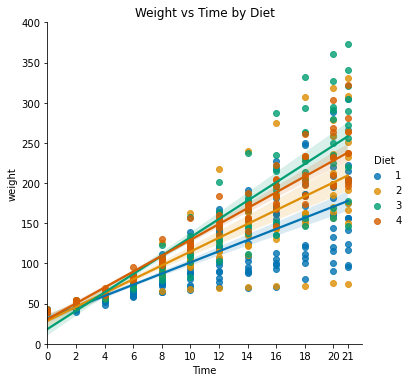

In [16]:
# Avg Weight vs Time for Chicks on each of the 4 diets
g = sns.lmplot(x='Time', y='weight', data=df, hue='Diet', palette='colorblind')
g.set(xlim=(0, 22))
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 21])
g.set(ylim=(0, 400))
plt.title('Weight vs Time by Diet');

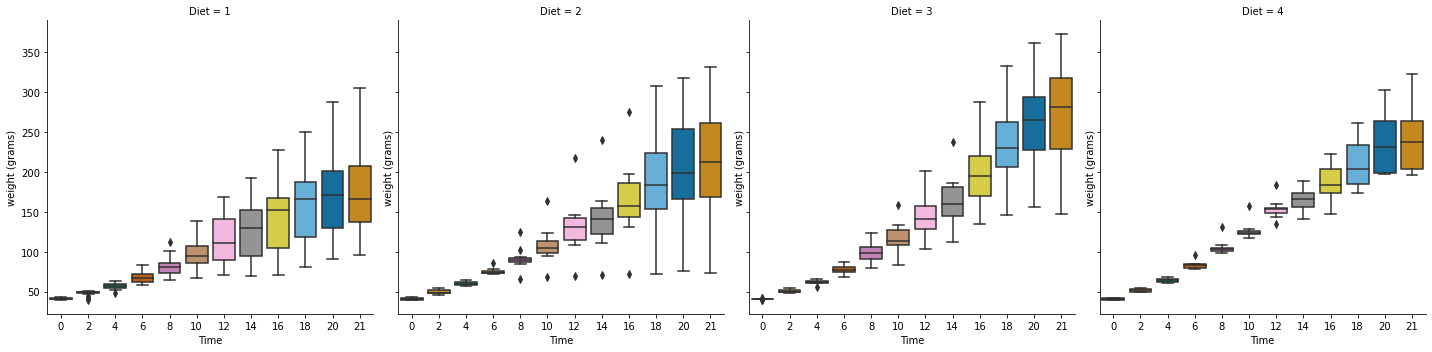

In [17]:
g = sns.catplot(x='Time', y='weight', data=df, col="Diet", kind='box', palette='colorblind')
g.set(ylabel ='weight (grams)')
plt.tight_layout()
plt.show()

It is clear from both plots that the chicks on diet 3 tended to be larger than the other chicks by the 21st day.  However, diet 4 has a much tighter grouping of weights throughout the measurement period.  Diets 1, 2, and 3 all have quite a bit of variability as the chicks grow older, but diet 4 remains consistent.